In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
audio_files = {
        'blues': "Audio_Features_3sec/blues/",
        'classical': "Audio_Features_3sec/classical/",
        'country': "Audio_Features_3sec/country/",
        'disco': "Audio_Features_3sec/disco/",
        'hiphop': "Audio_Features_3sec/hiphop/",
        'jazz': "Audio_Features_3sec/jazz/",
        'metal': "Audio_Features_3sec/metal/",
        'pop':"Audio_Features_3sec/pop/",
        'reggae': "Audio_Features_3sec/reggae/",
        'rock': "Audio_Features_3sec/rock/"
}
data = []

for genre in audio_files:
    for f in os.listdir(audio_files[genre]):  
        csv_df = pd.read_csv(f"{audio_files[genre]}{f}", header = 0)
        csv_df["genre"] = genre
        data.append(csv_df)

df = pd.concat(data, axis = 0, ignore_index=True)

In [3]:
y = df.pop('genre')
X = df

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

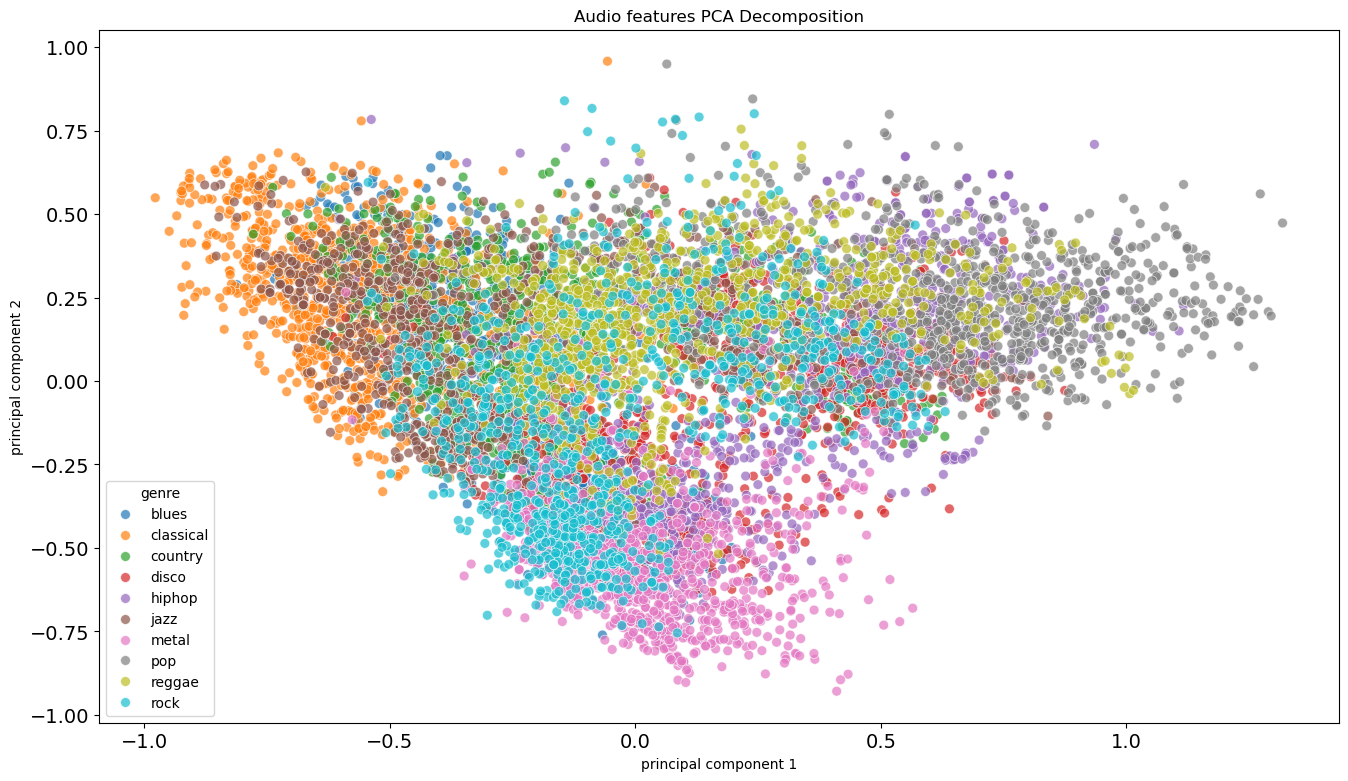

In [4]:
pca = PCA(n_components=2)
pca_components = pd.DataFrame(data = pca.fit_transform(X), columns = ["principal component 1", "principal component 2"])
pca_components = pd.concat([pca_components, y], axis = 1)
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = pca_components, hue = "genre", alpha = 0.7, s = 50)
plt.title("Audio features PCA Decomposition")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

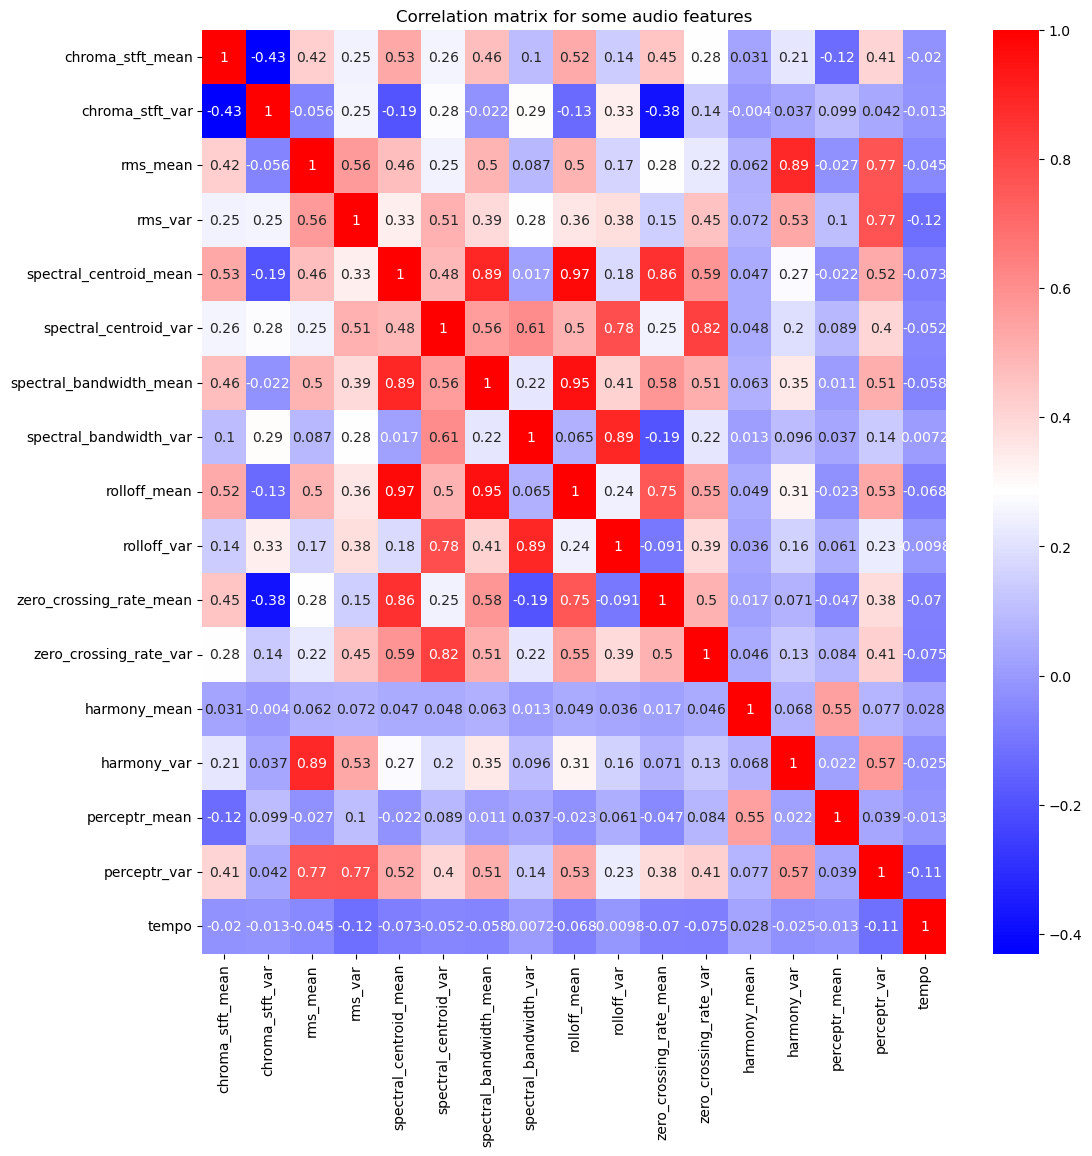

In [5]:
correlation_matrix = df.filter(regex = r'\b(?!\w*mfcc\w*)\w+\b')
correlation_matrix = correlation_matrix.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(correlation_matrix, cmap = "bwr", annot=True)
plt.title("Correlation matrix for some audio features")
plt.show()